In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

import numpy as np
import scipy.fft
import glob

import scipy.signal

from utils import style
style.make_style()

Noise data from 4 timeseries

In [8]:
data_noise = glob.glob('../data/noise/**')


d = np.array([np.loadtxt(data, skiprows=24) for data in data_noise])
d_avg = np.concatenate(d)

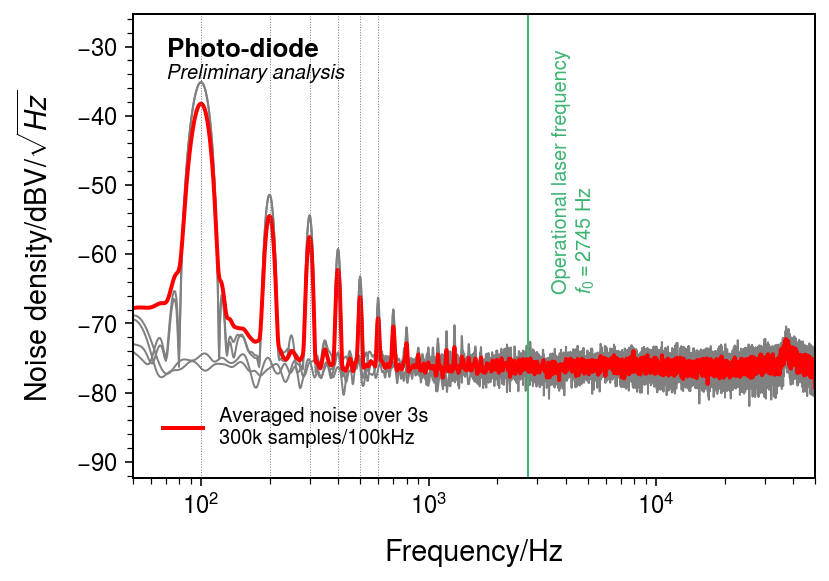

In [46]:
fig, ax = plt.subplots()

F, NSD = scipy.signal.welch(d_avg, 1e5, nperseg=0.1e5, nfft=3e5)
NSD = 20 * np.log10(np.sqrt(NSD))
ax.plot(F,NSD, 'r', label='Averaged noise over 3s\n300k samples/100kHz', zorder=0)
for di in d:
    f, nsd = scipy.signal.welch(di, 1e5, nperseg=0.1e5, nfft=1e5)
    nsd = 20 * np.log10(np.sqrt(nsd))
    ax.plot(f,nsd, 'gray', lw=1, zorder=-1)
ax.set_xlabel('Frequency/Hz')
ax.set_ylabel('Noise density/$\mathrm{dBV}/\sqrt{Hz}$')
hep.label.exp_text('Photo-diode', 'Preliminary analysis', loc=2, italic=(False, True))
ax.legend(loc=3)
ax.set_xscale('log')
ax.set_ylim(-92.33,-25.33)
ax.set_xlim(50, 50_000)
ax.axvline(2745, lw=1, color='mediumseagreen', zorder=-1)
ax.text(3.5e3, -65, 'Operational laser frequency\n$f_0=2745$ Hz', color='mediumseagreen', rotation=90)
for i in range(6):
    ax.axvline((i+1)*100, lw=0.5, ls=':', color='slategray')
plt.savefig('../figures/noise_nds.pdf', bbox_inches='tight')

![giphy.gif](giphy.gif)

In [56]:

noise_dB = float(NSD[np.nonzero(np.where(np.isclose(F,2745),NSD,0))])
noise_dB

-76.44658301655802

In [65]:
from utils.angle_data import get_data

s_Si_VLT = get_data(sorted(glob.glob('../data/dataSi_0/**.lvm')), 23)
p_Si_VLT = get_data(sorted(glob.glob('../data/dataSi_1/**.lvm')), 23)

s_Au_VLT = get_data(sorted(glob.glob('../data/dataAu_0/**.lvm')), 23)
p_Au_VLT = get_data(sorted(glob.glob('../data/dataAu_1/**.lvm')), 23)


In [67]:
def dB_MAG(VLT_adl: np.ndarray):
    angles = np.array([e.angle for e in VLT_adl])
    values = np.array([e.value for e in VLT_adl])
    return angles, 20 *np.log10(values)
    

sSi_ANG, sSi = dB_MAG(s_Si_VLT)
pSi_ANG, pSi = dB_MAG(p_Si_VLT)
sAu_ANG, sAu = dB_MAG(s_Au_VLT)
pAu_ANG, pAu = dB_MAG(p_Au_VLT)

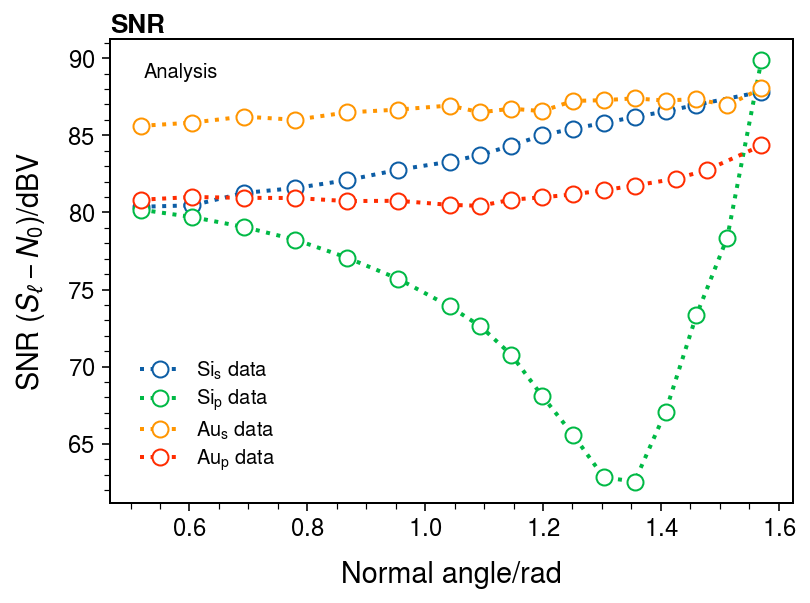

In [96]:
plt.plot(sSi_ANG, sSi - noise_dB, 'o:', mfc='w', label='$\mathrm{Si_s}$ data')
plt.plot(pSi_ANG, pSi - noise_dB, 'o:', mfc='w', label='$\mathrm{Si_p}$ data')
plt.plot(sAu_ANG, sAu - noise_dB, 'o:', mfc='w', label='$\mathrm{Au_s}$ data')
plt.plot(pAu_ANG, pAu - noise_dB, 'o:', mfc='w', label='$\mathrm{Au_p}$ data')
plt.xlabel('Normal angle/rad')
plt.ylabel('SNR ($S_\ell - N_0$)/dBV')
hep.label.exp_text(exp='SNR', loc=3, text='Analysis')
plt.legend()
plt.savefig('../figures/SNR.pdf', bbox_inches='tight')